In [9]:
import pandas as pd

path = r"C:\Users\offic\Desktop\Datasets\car_price_dataset.csv"

df = pd.read_csv(path)
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [22]:
# df.isnull().sum()
# df.describe()
# df.info()

In [30]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.histplot(df["Price"], bins=50, kde=True) 
# plt.show()

In [42]:
# df = df.dropna()
# df["Fuel_Type"].value_counts()

In [43]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

In [46]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,0,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,2,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,0,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,1,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,2,Semi-Automatic,286618,3,3,2867


In [48]:
selected_feature = ['Year','Mileage','Engine_Size','Fuel_Type']
X = df[selected_feature]
y = df['Price']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred = model.predict(X_test)


MAE = mean_squared_error(y_test,y_pred)
MSE = mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test,y_pred, squared=False)
R2_SCORE = r2_score(y_test,y_pred)


C:\Users\offic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R2 Score: {R2_SCORE}")

MAE: 1177551.876587087
MSE: 899.7707740585585
RMSE: 1085.1506239168307
R2 Score: 0.8769955381382079


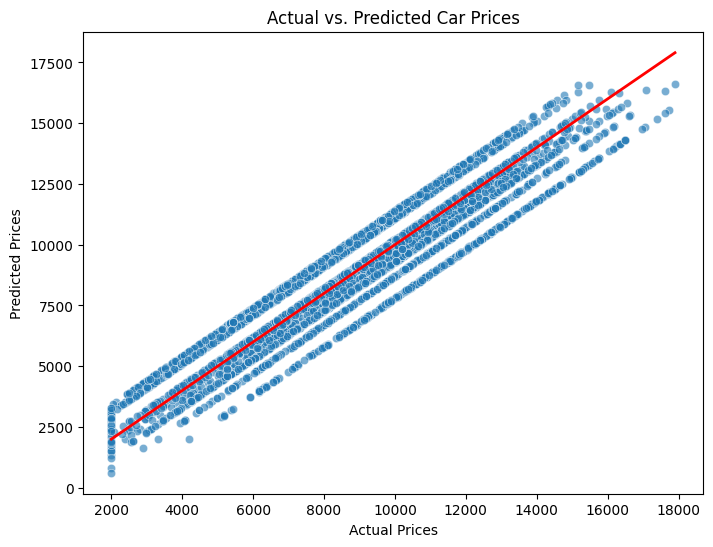

In [65]:
# Step 8: Visualizing Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)  # Reference line
plt.show()
